# T-SNE visualization with raw feature extraction of CIFAR-10

## Dependencies
* numpy
* tensorflow
* keras
* keras_vggface
* scikit-learn
* matplotlib
* glob
* PIL

### CIFAR-10 data visualization with T-SNE
The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. 
<br>
As its very compute intesive to use all the data so choosen 1000 images at random from the data set. This image dataset is subset of the CIFAR-10 data set. Chosen this particular data set to get a large number of lower resolution image data. This is a very good example of 10 different categories of data. This data set doesn't have any labels so analyzing the 1000 images manually is tedious with such low resolution images hence would be perfect choice to apply SOM techniques like T-SNE to get the pattern in data that to in visualized form.
<br>
<br>
It takes about 4 minutes for raw feature extraction and T-SNE(t-Distributed Stochastic Neighbor Embedding) run with 1000 images. 
(Approx time on Intel i7 3.2GHz with 16 GB RAM )

#### The 32x32 images are of have the following classes
* plane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck


#### The images can be obtained from:
http://www.cs.toronto.edu/~kriz/cifar.html or https://www.kaggle.com/c/cifar-10/data


### Raw feature extraction model:
Raw is more naive menthod between all three types. 
<br>
Hence choose this model for feature extraction. 

In [1]:
from time import time
import numpy as np
import tensorflow as tf
from PIL import Image
from sklearn.manifold import TSNE
import os, re, glob, pickle

In [2]:
from keras.engine import  Model
from keras.layers import Input
from keras_vggface.vggface import VGGFace
from keras.preprocessing import image
from keras_vggface import utils

import matplotlib.pyplot as plt
%pylab inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
# custom paramers: change these parameters to properly run on your machine
image_path = 'C:\\Machine_learning\\data_clean\\train\\melanoma/' # addres of images

#### Path of the foolder where images have been saved on the system
* "samp/" folder ( relative path to the jupyter notebook)

In [4]:
no_of_images = 2000 # number of images. It is recommended to use a square of 2 number

#### no_of_images: Can change this parameter to run with less number of images

In [5]:
ellipside =True # elipsoid or rectangular visualization

#### elipsoid or rectangular visualization
* Using ellipside visualization gives better understanding of the overall indivisual clusters 
* Whereas with rectangular, we get a more space optimized & merged image 

In [6]:
image_width = 64 # width and height of each visualized images

In [7]:
feature_extraction = 'raw' # feature extraction method

#### Choosing the feature extraction method
* The features have been extracted using a inception model. 
* We load the data from the samp/ folder with initial seed of 1000 images
* Will be plotting the final image in Ellipside format instead of rectangular flat.

In [8]:
# find all images
image_names  = glob.glob(image_path + "*.png") 
image_names +=glob.glob(image_path + "*.jpg")
image_names +=glob.glob(image_path + "*.gif")


* Using glob to gather all the image name 

In [9]:
# Let's display the internal variables to make sure all the images are getting processed properly
print(image_names)
print(image_path)

['C:\\Machine_learning\\data_clean\\train\\melanoma\\ISIC_0000000.jpg', 'C:\\Machine_learning\\data_clean\\train\\melanoma\\ISIC_0000001.jpg', 'C:\\Machine_learning\\data_clean\\train\\melanoma\\ISIC_0000002.jpg', 'C:\\Machine_learning\\data_clean\\train\\melanoma\\ISIC_0000003.jpg', 'C:\\Machine_learning\\data_clean\\train\\melanoma\\ISIC_0000004.jpg', 'C:\\Machine_learning\\data_clean\\train\\melanoma\\ISIC_0000006.jpg', 'C:\\Machine_learning\\data_clean\\train\\melanoma\\ISIC_0000007.jpg', 'C:\\Machine_learning\\data_clean\\train\\melanoma\\ISIC_0000008.jpg', 'C:\\Machine_learning\\data_clean\\train\\melanoma\\ISIC_0000009.jpg', 'C:\\Machine_learning\\data_clean\\train\\melanoma\\ISIC_0000010.jpg', 'C:\\Machine_learning\\data_clean\\train\\melanoma\\ISIC_0000011.jpg', 'C:\\Machine_learning\\data_clean\\train\\melanoma\\ISIC_0000012.jpg', 'C:\\Machine_learning\\data_clean\\train\\melanoma\\ISIC_0000013.jpg', 'C:\\Machine_learning\\data_clean\\train\\melanoma\\ISIC_0000014.jpg', 'C:\\

In [10]:
# suffle images
np.random.seed(3)
np.random.shuffle(image_names)

* Modifing the sequence in-place by shuffling the contents to avoid any bias.

In [11]:
if no_of_images > len(image_names):
    no_of_images = len(image_names)
image_names = image_names[:no_of_images]

* Checking if the no_of_images is set higher than actual number of images in the folder

In [12]:

# raw image pixels resized to 100x100
if feature_extraction == 'raw':
    print('using %s network/method for feature extraction'%feature_extraction)
    features = np.zeros([no_of_images, 100*100])
    for i, name in enumerate(image_names):
        features[i, :] = np.asarray(Image.open(name).resize((100, 100)).convert('L')).reshape(-1,)
        


using raw network/method for feature extraction


* We are translating a color image to black and white (mode “L”), the library uses the luma transform and resizing the image to 100x100
* basically we are trying the get the feature values based on intensity gradient in the image

In [13]:
# use tsne to cluster images in 2 dimensions
tsne = TSNE()
reduced = tsne.fit_transform(features)
reduced_transformed = reduced - np.min(reduced, axis=0)
reduced_transformed /= np.max(reduced_transformed, axis=0)
image_xindex_sorted = np.argsort(np.sum(reduced_transformed, axis=1))

* After getting the feature we now are applying T-SNE to reduce the dimensions of the system to get a better visualization.
<br> 
* t-SNE reduces the dimensionality of each point, the points in the lower-dimensional space preserve the pointwise distances from the original, higher-dimensional space in this case the similar images will be clustered together.

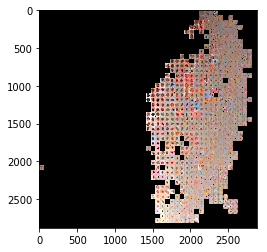

In [21]:
# drawing all images in a merged image
merged_width = int(np.ceil(np.sqrt(no_of_images))*image_width)
merged_image = np.zeros((merged_width, merged_width, 3), dtype='uint8')

for counter, index in enumerate(image_xindex_sorted):
    # set location
    if ellipside:
        a = np.ceil(reduced_transformed[counter, 0] * (merged_width-image_width-1)+1)
        b = np.ceil(reduced_transformed[counter, 1] * (merged_width-image_width-1)+1)
        a = int(a - np.mod(a-1,image_width) + 1)
        b = int(b - np.mod(b-1,image_width) + 1)
        if merged_image[a,b,0] != 0:
            continue
        image_address = image_names[counter]
        img = np.asarray(Image.open(image_address).resize((image_width, image_width)))
        merged_image[a:a+image_width, b:b+image_width,:] = img[:,:,:3]
    else:
        b = int(np.mod(counter, np.sqrt(no_of_images)))
        a = int(np.mod(counter//np.sqrt(no_of_images), np.sqrt(no_of_images)))
        image_address = image_names[index]
        img = np.asarray(Image.open(image_address).resize((image_width, image_width)))
        merged_image[a*image_width:(a+1)*image_width, b*image_width:(b+1)*image_width,:] = img[:,:,:3]

plt.imshow(merged_image)

In [22]:
plt.show()
merged_image = Image.fromarray(merged_image)

'''Saving the image for future reference and further study'''
if ellipside:
    if feature_extraction == 'inception':
        merged_image.save('merged-ellipsoide-inception.png')
    elif feature_extraction == 'raw':
        merged_image.save('merged-ellipsoide-raw_new.png')
    else:
        merged_image.save('merged-ellipsoide-vgg.png')
else:
    merged_image.save('merged.png')
    if feature_extraction == 'inception':
        merged_image.save('merged-inception.png')
    elif feature_extraction == 'raw':
        merged_image.save('merged-raw.png')
    else:
        merged_image.save('merged-vgg.png')

### T-SNE visulaization of the data 

#### Not so good ..... Could have been better with higher resolution images
* If we look more close to the image by zooming in or check the saved image, we can clearly see that most of the data has not been categorized properly in smaller clusters.
<br>
* First on the right bottom corner it has managed to categorize most of the birds but at the same time it has not been able to differentiate between birds and planes. So it has clustered them together. 
<br>
* If we observer carefully the image on the right middle part where it has again managed to get some of the automobiles but failed to differentiate cars & trucks. Again on the upper left side a small cluster of cars has been formed but some images of animals has managed to get in.
<br>
* As this method is based on raw features so after converting the image to Grayscale the intensity histogram is more or less similar for some dogs, cats & white/grey horses so they are clustered together on the left side in middle.
<br>
* Looking from top level it looks like the left side images has been more of dark shades whereas the right half is brighter. Making it evident that raw feature doesn’t do good job of classifying the categories.
<br>
* Things could have been different we had images of higher resolution where each categories would have distinctive feature sets.
<br>
* Overall it’s better to inception or vgg or directly CNN to get a better feature set to do reduction on T -SNE


### Reference :
* https://arxiv.org/abs/1512.00567
* https://github.com/tensorflow/models/tree/master/research/inception
* https://www.tensorflow.org/tutorials/image_recognition
* http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf
* https://lvdmaaten.github.io/tsne/
* https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding